In [1]:
from datetime import datetime
from datetime import timedelta
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from nltk import word_tokenize
import requests
from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from collections import OrderedDict
import pprint
from textblob import TextBlob 
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from operator import itemgetter
import gensim.summarization
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
from wordcloud import WordCloud, STOPWORDS
from sklearn import linear_model
import statsmodels.api as sm
import pyLDAvis.gensim

In [2]:
df = pd.read_csv("BitcoinTweets.csv")

In [6]:
df.head()

,table_key,tweet_id,text,date,favorites,retweets
0,1,892535404292968448,#bitcoin #bitcoinfork #hardfork #bitcoincash p...,1501631940,2,0
1,2,892535387280867328,#bitcoin : Whats going on with the digital cur...,1501631940,0,0
2,3,892535372139249664,"From the #Bitcoin White Paper: ""We define an e...",1501631940,1,0
3,4,892535371958898688,#Bitcoin : What's going on with the #digitalcu...,1501631940,5,0
4,5,892535353063731200,Found an app called @SlideCoin that pays #bitc...,1501631940,0,0


In [4]:
def clean_tweet(sentence):
    words = word_tokenize(sentence)
    lowercase_words = [word.lower() for word in words
                       if word not in stopwords.words() and word.isalpha()]
    temp_text = ' '.join(lowercase_words)
    return temp_text

In [5]:
def get_tweet_sentiment(tweet): 
    analysis = TextBlob(clean_tweet(tweet)) 
    if (analysis.sentiment.polarity > 0): 
        return 1
    elif (analysis.sentiment.polarity == 0): 
        return 0
    else:
        return -1

In [6]:
get_tweet_sentiment(df['text'][10])

0

In [7]:
def vader_comparison(sentence):
    sentence=clean_tweet(sentence)
    analyzer = SentimentIntensityAnalyzer()
    pos=compound=neu=neg=0
    vs = analyzer.polarity_scores(sentence)
    pos = vs['pos']
    neu = vs['neu']
    neg = vs['neg']
    compound = vs['compound']
    if (compound > 0):
        return 1
    elif (compound == 0):
        return 0
    else:
        return -1

In [8]:
vader_comparison(df['text'][1000])

0

In [9]:
get_tweet_sentiment(df['text'][1000])

1

In [10]:
df['score'] = 0.75*df['retweets'] + 0.25*df['favorites']
df = df.sort_values(['score'], ascending=False)
df = df[df['score'] > 2.5]
df1 = df.sample(n=100000)

In [12]:
df1['score'].describe()

KeyError: 'score'

In [17]:
df1.to_csv("TweetsData.csv")

In [ ]:
%%timeit
df1['sentiment_textblob'] = df1['text'].apply(lambda x: get_tweet_sentiment(x))

In [ ]:
%%timeit
df1['sentiment_vader'] = df1['text'].apply(lambda x: vader_comparison(x))

In [13]:
df1 = pd.read_csv('cleaned.csv')

In [2]:
df1 = pd.read_csv('tweets_with_vader.csv')

In [3]:
df1

,Unnamed: 0,Unnamed: 0.1,table_key,tweet_id,text,date,favorites,retweets,score,sentiment_vader
0,734,1198341,1228409,932667111025053698,Is # bitcoin the equivalent of financial cryst...,1511200140,2,3,2.75,0
1,21238,868183,891335,940019316891799552,How can cryptocurrencies be implemented into s...,1512953040,6,3,3.75,1
2,8114,1681775,1722522,944799626078707712,Digital transformation in different ages! # Io...,1514092740,10,4,5.50,0
3,52325,3895047,3989094,957493227799629825,THE most corrupt people in # crypto: @ brian_a...,1517119140,2570,888,1308.50,0
4,77650,2285950,2341391,852141792120229888,# FinTech as a use case of # Blockchain http:/...,1492001400,13,12,12.25,0
5,48997,5188420,5319106,913498580748451840,Join over 500.000 people with the worlds leadi...,1506630000,0,4,3.00,1
6,26875,4654718,4771375,876522432131149824,El Oro digital que todos quieren. http://bit.l...,1497814200,3,3,3.00,0
7,986,4675233,4792569,961546218802425856,Crypto Experts Predict 2018 Bull Run: # bitcoi...,1518085440,11,4,5.75,0
8,79859,1252246,1283031,933069763311489032,Future of Bitcoin Threatened by Quantum Comput...,1511296140,2,3,2.75,-1
9,45122,1293559,1325288,932927046669557760,The number of transactions per day has been st...,1511262060,16,8,10.00,1


In [4]:
def combine():
    tweet1 = ''
    for i in range(0, len(df1)):
        tweet1 = tweet1 + '\n' + df1['text'][i]
    tweets = tweet1.replace('\n\n', ' ')
    tweets = tweets.replace('\n', ' ')
    tweets = ''.join(tweets)
    words = word_tokenize(tweets)
    lowercase = [word.lower() for word in words
                 if word not in stopwords.words() and word.isalpha()]
    tweets = ' '.join(lowercase)
    return tweets

In [5]:
def wordcloud():
    tweets = combine()
    stop_words = set(list(STOPWORDS) + ['bitcoin','https','btc'])
    wordcloud = WordCloud(stopwords=stop_words,background_color='white',max_words=30, collocations=False).generate(tweets)
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.savefig("Bitcoin-wordcloud.png", format="png", dpi=300)
    plt.show()
    return wordcloud

In [ ]:
word_cloud = wordcloud()

In [17]:
def draw_wordcloud(lda,topicnum,min_size=0,STOPWORDS=[]):
    word_list=[]
    prob_total = 0
    for word,prob in lda.show_topic(topicnum,topn=50):
        prob_total +=prob
    for word,prob in lda.show_topic(topicnum,topn=50):
        if word in STOPWORDS or  len(word) < min_size:
            continue
        freq = int(prob/prob_total*1000)
        alist=[word]
        word_list.extend(alist*freq)

    text = ' '.join(word_list)
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',max_words=20, collocations=False).generate(text)

    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
    return None

In [18]:
def topic():
    text = combine()
    new_text = [nltk.word_tokenize(text)]
    dictionary = corpora.Dictionary(new_text) 
    corpus = [dictionary.doc2bow(text) for text in new_text]
    lda = LdaModel(corpus, id2word=dictionary, num_topics=5, passes=10)
    lda.get_document_topics(corpus,minimum_probability=0.05)
    sorted(lda.get_document_topics(corpus,minimum_probability=0),key=itemgetter(1),reverse=True)
    pp = pprint.PrettyPrinter(indent=4)
    pp.pprint(lda.print_topics(num_words=8))
    draw_wordcloud(lda,4)
    return lda, corpus, dictionary

[   (   0,
        '0.085*"bitcoin" + 0.025*"http" + 0.023*"https" + 0.019*"blockchain" + '
        '0.013*"btc" + 0.012*"cryptocurrency" + 0.011*"crypto" + '
        '0.008*"ethereum"'),
    (   1,
        '0.003*"bitcoin" + 0.001*"http" + 0.001*"https" + 0.001*"blockchain" + '
        '0.000*"btc" + 0.000*"crypto" + 0.000*"cryptocurrency" + '
        '0.000*"fintech"'),
    (   2,
        '0.007*"bitcoin" + 0.003*"http" + 0.002*"https" + 0.002*"blockchain" + '
        '0.002*"cryptocurrency" + 0.001*"crypto" + 0.001*"btc" + '
        '0.001*"ethereum"'),
    (   3,
        '0.006*"bitcoin" + 0.001*"http" + 0.001*"https" + 0.001*"blockchain" + '
        '0.001*"btc" + 0.001*"cryptocurrency" + 0.001*"crypto" + '
        '0.001*"fintech"'),
    (   4,
        '0.002*"bitcoin" + 0.001*"https" + 0.001*"http" + 0.001*"blockchain" + '
        '0.000*"btc" + 0.000*"crypto" + 0.000*"cryptocurrency" + '
        '0.000*"ethereum"')]


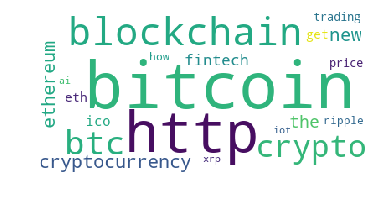

In [19]:
lda, corpus, dictionary = topic()

In [24]:
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/Users/SubhamKedia/anaconda/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [7]:
bitcoin = pd.read_csv('bitcoins.csv')

In [9]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3603136 entries, 0 to 3603135
Data columns (total 8 columns):
Timestamp            int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtypes: float64(7), int64(1)
memory usage: 219.9 MB


In [ ]:
len(bitcoin)

In [ ]:
bitcoin = bitcoin.dropna()

In [ ]:
bitcoin

In [ ]:
bitcoin['Timestamp'] = bitcoin['Timestamp'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))

In [ ]:
df1['Timestamp'] = df1['date'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))

In [ ]:
df1.set_index('Timestamp', inplace=True)
bitcoin.set_index('Timestamp', inplace=True)

In [ ]:
bitcoin.head()

In [ ]:
#df1 = df1.merge(bitcoin, how='inner', on=['Timestamp'])

In [ ]:
#df1.sort_values('Timestamp', inplace=True)

In [ ]:
#df1.head()

In [ ]:
df1.head()

In [ ]:
df1 = df1.sort_values('Timestamp')

In [ ]:
df1.head()

In [ ]:
df1.index = pd.to_datetime(df1.index)
bitcoin.index = pd.to_datetime(bitcoin.index)

In [ ]:
df1.index = df1.index.values.astype('<M8[m]')
bitcoin.index = bitcoin.index.values.astype('<M8[m]')

In [ ]:
df1['30_min_prev_avg'] = np.nan
df1['30_min_next_avg'] = np.nan

In [ ]:
for i in df1.index:
    start_index = i - timedelta(minutes=30)
    avg_prev  = np.mean(bitcoin[(bitcoin.index >= start_index) & (bitcoin.index <=i)]['Close'])
    df1['30_min_prev_avg'].loc[i] = avg_prev
    last_index = i+ timedelta(minutes=30)
    avg_next = np.mean(bitcoin[(bitcoin.index >= i) & (bitcoin.index <= last_index)]['Close'])
    df1['30_min_next_avg'].loc[i] = avg_next

In [ ]:
df1['avg_diff'] = df1['30_min_prev_avg'] - df1['30_min_next_avg']

In [ ]:
df1['pos_sent'] = np.repeat(0, len(df1))
df1['neg_sent'] = np.repeat(0, len(df1))

In [ ]:
df1.head()

In [ ]:
for index, row in df1.iterrows():
    if row['sentiment_vader'] == 1:
        df1.set_value(index,'pos_sent',1)
    elif row['sentiment_vader'] == -1:
        df1.set_value(index,'neg_sent',1)

In [ ]:
df1.head()

In [ ]:
y = df1['avg_diff'].values.copy()
x1 = df1['pos_sent'].values.copy()
x2 = df1['neg_sent'].values.copy()
X = np.array(list(zip(x1, x2)))
model = linear_model.LinearRegression()
model.fit(X, y)

In [ ]:
X = df1[['pos_sent','neg_sent','score']]
X = sm.add_constant(X)
y = df1['avg_diff']
model = sm.OLS(y,X,missing='drop')
result = model.fit()
print(result.summary())

In [ ]:
plt.hist(df1['sentiment_vader'])
plt.ylabel("Number of occurences")
plt.xlabel("Sentiment Score")
plt.title("Sentiment Score of Tweets")
plt.savefig("Sentiment Score.jpeg", format='jpeg')
plt.show()